In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Load the dataset with 5 features
file_path = r'E:\Bearings\Implementations\processed_bearing_data.xlsx'
data = pd.read_excel(file_path)

# Split features (X) and labels (y)
X = data.iloc[:, :-1]  # 5 features
y = data.iloc[:, -1]   # Output labels (4 classes)


In [2]:
# Step 1: Train-Validation-Test split (75%-15%-10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)  # 25% for validation+test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42, stratify=y_temp)  # 40% of 25% -> 10% test


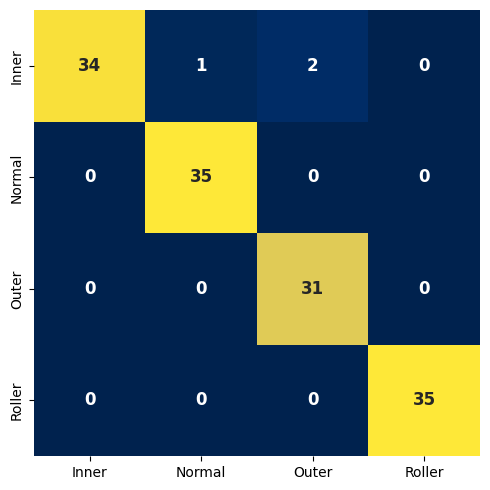

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train and plot confusion matrix for Coarse Gaussian SVM
coarse_gaussian_svm = SVC(kernel='rbf', gamma=0.1, C=1)
coarse_gaussian_svm.fit(X_train, y_train)

# Predict on the test data
y_pred_coarse = coarse_gaussian_svm.predict(X_test)

# Calculate the confusion matrix
cm_coarse = confusion_matrix(y_test, y_pred_coarse)

# Define custom class labels
class_labels = ['Inner', 'Normal', 'Outer', 'Roller']

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm_coarse, annot=True, annot_kws={"weight": "bold", "size": 12},fmt='d', cmap='cividis', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)

# Display the plot
plt.tight_layout()
plt.show()


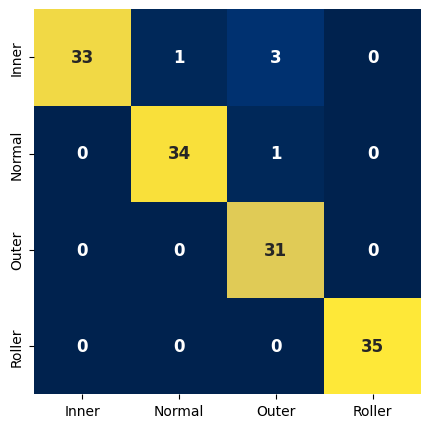

In [4]:
# Train and plot confusion matrix for Wide Neural Network
wide_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, learning_rate_init=0.001)
wide_nn.fit(X_train, y_train)

# Predict on the test data
y_pred_wide_nn = wide_nn.predict(X_test)

# Calculate the confusion matrix
cm_wide_nn = confusion_matrix(y_test, y_pred_wide_nn)

# Define custom class labels
class_labels = ['Inner', 'Normal', 'Outer', 'Roller']

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm_wide_nn, annot=True, annot_kws={"weight": "bold", "size": 12},fmt='d', cmap='cividis', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)
plt.show()


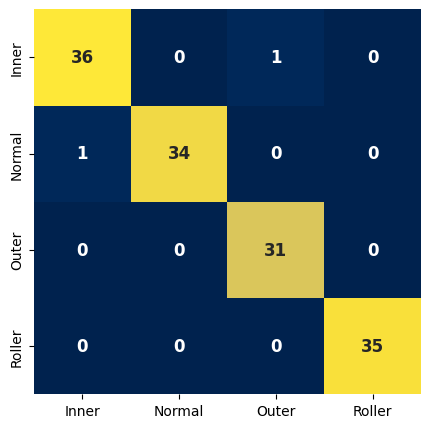

In [5]:
# Train and plot confusion matrix for Fine Gaussian SVM
fine_gaussian_svm = SVC(kernel='rbf', gamma=0.75, C=1)
fine_gaussian_svm.fit(X_train, y_train)

# Predict on the test data
y_pred_fine = fine_gaussian_svm.predict(X_test)

# Calculate the confusion matrix
cm_fine = confusion_matrix(y_test, y_pred_fine)

# Define custom class labels
class_labels = ['Inner', 'Normal', 'Outer', 'Roller']

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm_fine, annot=True, annot_kws={"weight": "bold", "size": 12},fmt='d', cmap='cividis', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)
plt.show()


In [6]:
from sklearn.manifold import TSNE

# Perform t-SNE on the test data to reduce it to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)  # This will be used to plot t-SNE for all models


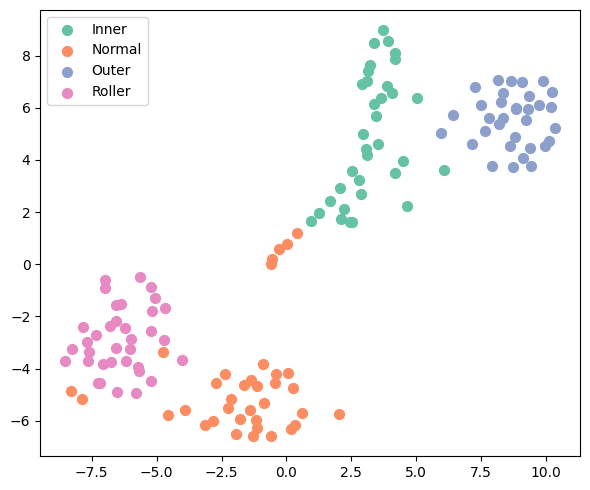

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Custom labels and color mapping for the classes
label_mapping = {0: 'Inner', 1: 'Normal', 2: 'Outer', 3: 'Roller'}
colors = sns.color_palette("Set2", as_cmap=False, n_colors=4)  # Similar to the image

# Train and predict with Coarse Gaussian SVM
coarse_gaussian_svm = SVC(kernel='rbf', gamma=0.1, C=1)
coarse_gaussian_svm.fit(X_train, y_train)
y_pred_coarse = coarse_gaussian_svm.predict(X_test)

# Perform t-SNE on the test data to reduce it to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)  # This will be used to plot t-SNE for all models

# Unique labels from the predicted test data
unique_labels = np.unique(y_pred_coarse)

# Plot t-SNE for Coarse Gaussian SVM with color-coded classes and a legend
plt.figure(figsize=(6, 5))  # Set figure size similar to the uploaded example

# Loop through unique labels and plot them with their respective class name and color
for i, label in enumerate(unique_labels):
    plt.scatter(X_test_tsne[y_pred_coarse == label, 0],
                X_test_tsne[y_pred_coarse == label, 1],
                c=[colors[i]], label=label_mapping[label], s=50)

# Add a legend to differentiate the class labels
plt.legend(loc='best', fontsize=10)


# Display the plot
plt.tight_layout()
plt.show()


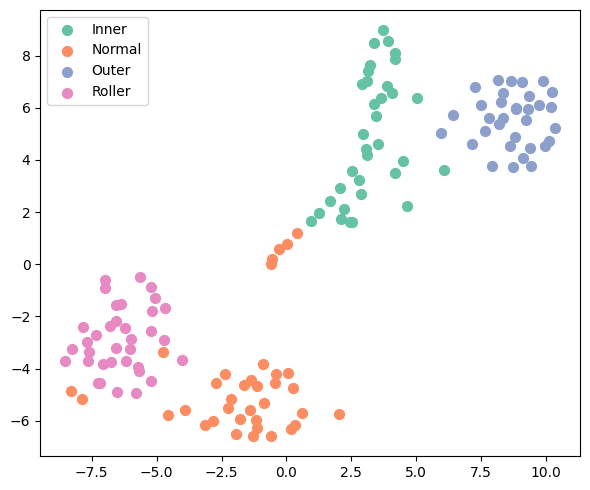

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier
import seaborn as sns

# Custom labels and color mapping for the classes
label_mapping = {0: 'Inner', 1: 'Normal', 2: 'Outer', 3: 'Roller'}
colors = sns.color_palette("Set2", as_cmap=False, n_colors=4)  # Similar to the image you provided

# Train and predict with Wide Neural Network
wide_nn = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=10000, learning_rate_init=0.0001)
wide_nn.fit(X_train, y_train)
y_pred_wide_nn = wide_nn.predict(X_test)

# Perform t-SNE on the test data to reduce it to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)  # This will be used to plot t-SNE for all models

# Unique labels from the predicted test data
unique_labels = np.unique(y_pred_wide_nn)

# Plot t-SNE for Wide Neural Network with color-coded classes and a legend
plt.figure(figsize=(6, 5))  # Adjusted size similar to the example image

# Loop through unique labels and plot them with their respective class name and color
for i, label in enumerate(unique_labels):
    plt.scatter(X_test_tsne[y_pred_wide_nn == label, 0],
                X_test_tsne[y_pred_wide_nn == label, 1],
                c=[colors[i]], label=label_mapping[label], s=50)

# Add a legend to differentiate the class labels
plt.legend(loc='best', fontsize=10)


# Display the plot
plt.tight_layout()
plt.show()


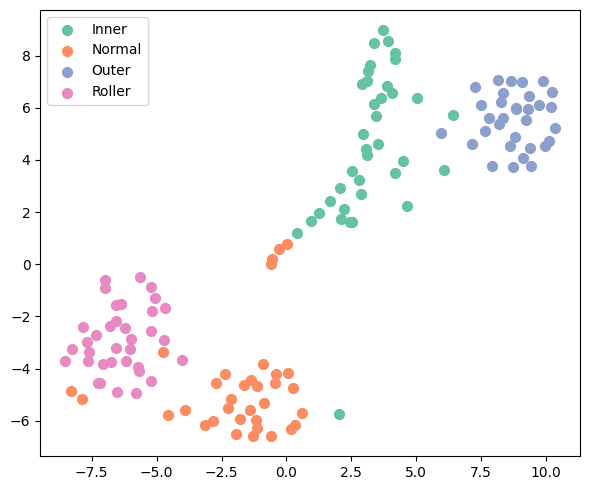

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.svm import SVC
import seaborn as sns

# Custom labels and color mapping for the classes
label_mapping = {0: 'Inner', 1: 'Normal', 2: 'Outer', 3: 'Roller'}
colors = sns.color_palette("Set2", as_cmap=False, n_colors=4)  # Using the Set2 color palette

# Train and predict with Fine Gaussian SVM
fine_gaussian_svm = SVC(kernel='rbf', gamma=0.75, C=1)
fine_gaussian_svm.fit(X_train, y_train)
y_pred_fine = fine_gaussian_svm.predict(X_test)

# Perform t-SNE on the test data to reduce it to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)  # This will be used to plot t-SNE for all models

# Unique labels from the predicted test data
unique_labels = np.unique(y_pred_fine)

# Plot t-SNE for Fine Gaussian SVM with color-coded classes and a legend
plt.figure(figsize=(6, 5))  # Adjusted size similar to the example image

# Loop through unique labels and plot them with their respective class name and color
for i, label in enumerate(unique_labels):
    plt.scatter(X_test_tsne[y_pred_fine == label, 0],
                X_test_tsne[y_pred_fine == label, 1],
                c=[colors[i]], label=label_mapping[label], s=50)

# Add a legend to differentiate the class labels
plt.legend(loc='best', fontsize=10)


# Display the plot
plt.tight_layout()
plt.show()


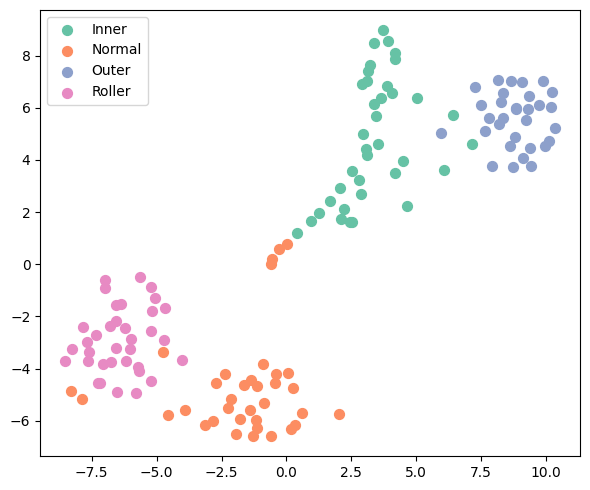

In [15]:
# Plot t-SNE for the actual labels
plt.figure(figsize=(6, 5))

# Loop through unique actual labels (y_test) and plot them with respective colors
for i, label in enumerate(np.unique(y_test)):
    plt.scatter(X_test_tsne[y_test == label, 0],
                X_test_tsne[y_test == label, 1],
                c=[colors[i]], label=label_mapping[label], s=50)

# Add a legend for the actual classes
plt.legend(loc='best', fontsize=10)


plt.tight_layout()
plt.show()


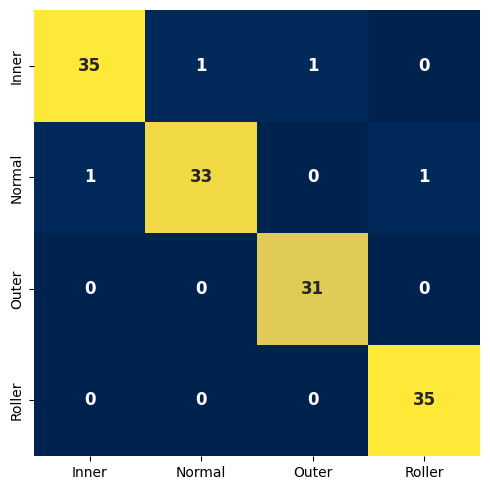

In [24]:
# Train and plot confusion matrix for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Define custom class labels
class_labels = ['Inner', 'Normal', 'Outer', 'Roller']

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm_rf, annot=True, annot_kws={"weight": "bold", "size": 12}, fmt='d', cmap='cividis', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

# Display the plot
plt.tight_layout()
#plt.title("Confusion Matrix: Random Forest")
plt.show()


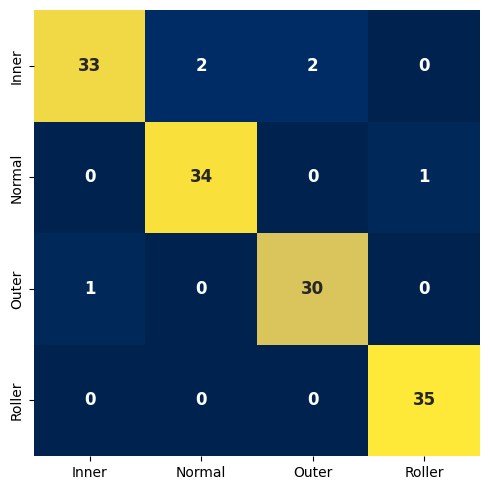

In [28]:
# Train and plot confusion matrix for Ensemble Bagged Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Train Ensemble Bagged Tree model
ensemble_bagged_tree = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
ensemble_bagged_tree.fit(X_train, y_train)

# Predict on the test data
y_pred_bagged = ensemble_bagged_tree.predict(X_test)

# Calculate the confusion matrix
cm_bagged = confusion_matrix(y_test, y_pred_bagged)

# Define custom class labels
class_labels = ['Inner', 'Normal', 'Outer', 'Roller']

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm_bagged, annot=True, annot_kws={"weight": "bold", "size": 12}, fmt='d', cmap='cividis', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

# Display the plot
plt.tight_layout()
#plt.title("Confusion Matrix: Ensemble Bagged Tree")
plt.show()


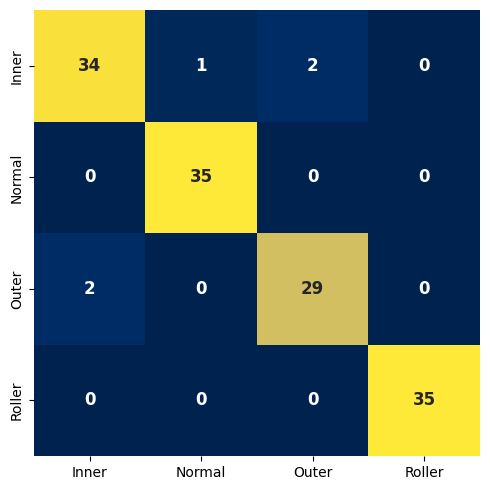

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train and plot confusion matrix for Narrow Neural Network
narrow_nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
narrow_nn.fit(X_train, y_train)

# Predict on the test data
y_pred_narrow_nn = narrow_nn.predict(X_test)

# Calculate the confusion matrix
cm_narrow_nn = confusion_matrix(y_test, y_pred_narrow_nn)

# Define custom class labels
class_labels = ['Inner', 'Normal', 'Outer', 'Roller']

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm_narrow_nn, annot=True, annot_kws={"weight": "bold", "size": 12}, fmt='d', cmap='cividis', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

# Display the plot
plt.tight_layout()
#plt.title("Confusion Matrix: Narrow Neural Network (NN)")
plt.show()


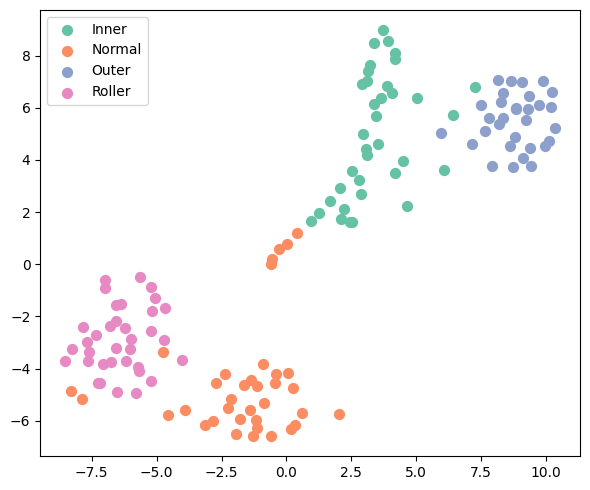

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier
import seaborn as sns

# Custom labels and color mapping for the classes
label_mapping = {0: 'Inner', 1: 'Normal', 2: 'Outer', 3: 'Roller'}
colors = sns.color_palette("Set2", as_cmap=False, n_colors=4)  # Choose a suitable color palette

# Train and predict with Wide Neural Network
wide_nn = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=10000, learning_rate_init=0.0001)
wide_nn.fit(X_train, y_train)
y_pred_wide_nn = wide_nn.predict(X_test)

# Perform t-SNE on the test data to reduce it to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)  # This will be used to plot t-SNE for all models

# Unique labels from the predicted test data
unique_labels = np.unique(y_pred_wide_nn)

# Plot t-SNE for Wide Neural Network with color-coded classes and a legend
plt.figure(figsize=(6, 5))  # Adjusted size similar to your example

# Loop through unique labels and plot them with their respective class name and color
for i, label in enumerate(unique_labels):
    plt.scatter(X_test_tsne[y_pred_wide_nn == label, 0],
                X_test_tsne[y_pred_wide_nn == label, 1],
                c=[colors[i]], label=label_mapping[label], s=50)

# Add a legend to differentiate the class labels
plt.legend(loc='best', fontsize=10)

# Set titles and labels for clarity

# Display the plot
plt.tight_layout()
plt.show()
